This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 1s 0us/step


In [13]:
#print(reverse_word_index.get(-1))

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [14]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [18]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5568 - accuracy: 0.7603 - val_loss: 0.4177 - val_accuracy: 0.8608
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3419 - accuracy: 0.8861 - val_loss: 0.3337 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2547 - accuracy: 0.9132 - val_loss: 0.3262 - val_accuracy: 0.8637
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2051 - accuracy: 0.9311 - val_loss: 0.3062 - val_accuracy: 0.8747
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1718 - accuracy: 0.9439 - val_loss: 0.2799 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1473 - accuracy: 0.9533 - val_loss: 0.2921 - val_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1270 - accuracy: 0.9609 - val_loss: 0.2977 - val_accuracy: 0.8849
Epoch 8/20
30

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

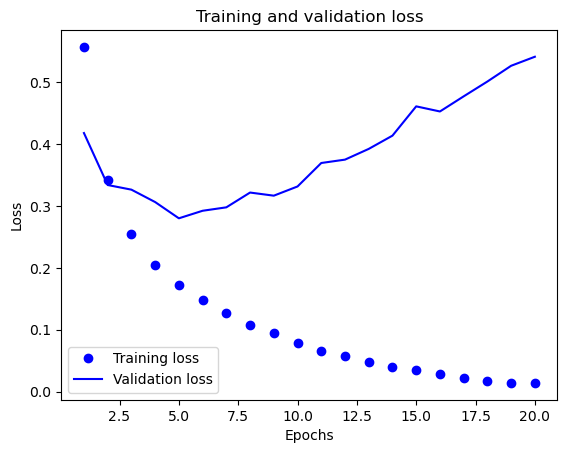

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

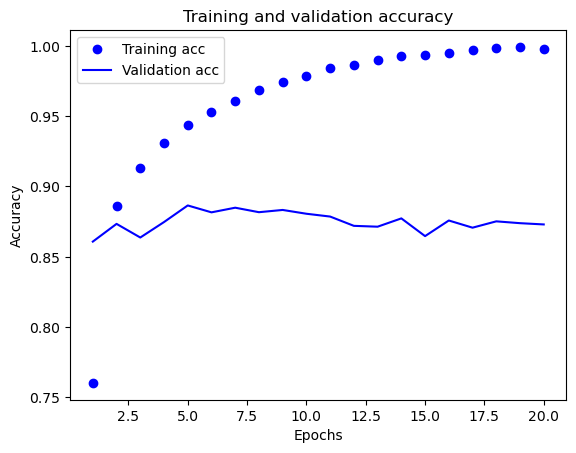

In [23]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [24]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4734 - accuracy: 0.8112
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2777 - accuracy: 0.9001
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2180 - accuracy: 0.9205
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2836 - accuracy: 0.8866


In [25]:
results

[0.28360867500305176, 0.8866000175476074]

### Using a trained model to generate predictions on new data

In [26]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.2556978 ],
       [0.9999397 ],
       [0.91593283],
       ...,
       [0.11723392],
       [0.10005502],
       [0.6465432 ]], dtype=float32)

### Further experiments

>**You used two representation layers before the final classification layer. Try using
one or three representation layers, and see how doing so affects validation and
test accuracy.**

In [27]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=8, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/8
49/49 [==============================] - 1s 9ms/step - loss: 0.4599 - accuracy: 0.8215
Epoch 2/8
49/49 [==============================] - 0s 9ms/step - loss: 0.2931 - accuracy: 0.9000
Epoch 3/8
49/49 [==============================] - 0s 9ms/step - loss: 0.2371 - accuracy: 0.9180
Epoch 4/8
49/49 [==============================] - 0s 9ms/step - loss: 0.2080 - accuracy: 0.9272
Epoch 5/8
49/49 [==============================] - 0s 9ms/step - loss: 0.1860 - accuracy: 0.9360
Epoch 6/8
49/49 [==============================] - 0s 9ms/step - loss: 0.1702 - accuracy: 0.9413
Epoch 7/8
49/49 [==============================] - 0s 9ms/step - loss: 0.1569 - accuracy: 0.9458
Epoch 8/8
782/782 [==============================] - 1s 1ms/step - loss: 0.2993 - accuracy: 0.8820


In [29]:
results

[0.29927858710289, 0.8819599747657776]

In [32]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.5110 - accuracy: 0.7753
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2901 - accuracy: 0.8988
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2146 - accuracy: 0.9238
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3001 - accuracy: 0.8828


In [33]:
results

[0.30005019903182983, 0.8827999830245972]

>**Try using layers with more units or fewer units: 32 units, 64 units, and so on.**

In [34]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4455 - accuracy: 0.8123
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2647 - accuracy: 0.9038
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2124 - accuracy: 0.9215
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3021 - accuracy: 0.8799


[0.30208146572113037, 0.8799200057983398]

In [35]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 19ms/step - loss: 0.4505 - accuracy: 0.7938
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2612 - accuracy: 0.8984
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2144 - accuracy: 0.9175
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2982 - accuracy: 0.8814


[0.29821088910102844, 0.8813599944114685]

In [36]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 21ms/step - loss: 0.4825 - accuracy: 0.7716
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2792 - accuracy: 0.8906
Epoch 3/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2165 - accuracy: 0.9151
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3046 - accuracy: 0.8804


[0.30460333824157715, 0.8803600072860718]

>**Try using the mse loss function instead of binary_crossentropy.**

In [37]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.1630 - accuracy: 0.8094
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.0942 - accuracy: 0.8925
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.0729 - accuracy: 0.9140
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.8851


[0.08552278578281403, 0.8851199746131897]

### Wrapping up

>**Try using the tanh activation (an activation that was popular in the early days of
neural networks) instead of relu.**

In [39]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/10
49/49 [==============================] - 1s 10ms/step - loss: 0.4335 - accuracy: 0.8232
Epoch 2/10
49/49 [==============================] - 0s 10ms/step - loss: 0.2488 - accuracy: 0.9085
Epoch 3/10
49/49 [==============================] - 1s 11ms/step - loss: 0.1944 - accuracy: 0.9271
Epoch 4/10
49/49 [==============================] - 1s 10ms/step - loss: 0.1634 - accuracy: 0.9410
Epoch 5/10
49/49 [==============================] - 1s 10ms/step - loss: 0.1419 - accuracy: 0.9490
Epoch 6/10
49/49 [==============================] - 1s 10ms/step - loss: 0.1273 - accuracy: 0.9558
Epoch 7/10
49/49 [==============================] - 1s 10ms/step - loss: 0.1144 - accuracy: 0.9612
Epoch 8/10
49/49 [==============================] - 1s 10ms/step - loss: 0.1007 - accuracy: 0.9672
Epoch 9/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0975 - accuracy: 0.9662
Epoch 10/10
782/782 [==============================] - 1s 2ms/step - loss: 0.4686 - accuracy: 0.8604


[0.4686252474784851, 0.8604400157928467]

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [40]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [41]:
len(train_data)

8982

In [42]:
len(test_data)

2246

In [43]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [51]:
#type(train_data)

**Decoding newswires back to text**

In [62]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i-3, "?") for i in
    train_data[0]])

In [63]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [53]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [64]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [65]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [66]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [67]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [68]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [69]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [70]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 2.8451 - accuracy: 0.4637 - val_loss: 1.9536 - val_accuracy: 0.5810
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.6654 - accuracy: 0.6502 - val_loss: 1.4423 - val_accuracy: 0.6750
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.2709 - accuracy: 0.7315 - val_loss: 1.2404 - val_accuracy: 0.7240
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0431 - accuracy: 0.7775 - val_loss: 1.1242 - val_accuracy: 0.7530
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8684 - accuracy: 0.8097 - val_loss: 1.0332 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.7238 - accuracy: 0.8495 - val_loss: 0.9928 - val_accuracy: 0.7880
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6060 - accuracy: 0.8747 - val_loss: 0.9321 - val_accuracy: 0.8090
Epoch 8/20
16

**Plotting the training and validation loss**

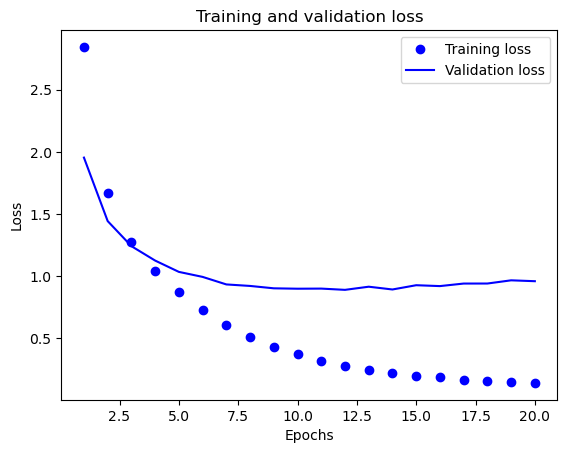

In [71]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

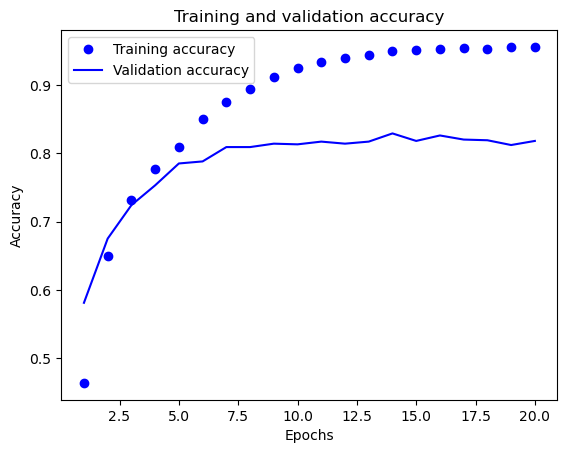

In [72]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [73]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 17ms/step - loss: 2.6789 - accuracy: 0.4652
Epoch 2/9
18/18 [==============================] - 0s 16ms/step - loss: 1.5165 - accuracy: 0.6916
Epoch 3/9
18/18 [==============================] - 0s 17ms/step - loss: 1.1518 - accuracy: 0.7524
Epoch 4/9
18/18 [==============================] - 0s 16ms/step - loss: 0.9340 - accuracy: 0.8010
Epoch 5/9
18/18 [==============================] - 0s 16ms/step - loss: 0.7689 - accuracy: 0.8338
Epoch 6/9
18/18 [==============================] - 0s 16ms/step - loss: 0.6402 - accuracy: 0.8629
Epoch 7/9
18/18 [==============================] - 0s 16ms/step - loss: 0.5286 - accuracy: 0.8921
Epoch 8/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4434 - accuracy: 0.9076
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9420 - accuracy: 0.7898


In [74]:
results

[0.942013144493103, 0.7898486256599426]

In [75]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18833481745325023

### Generating predictions on new data

In [76]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [77]:
predictions[0].shape

(46,)

In [78]:
np.sum(predictions[0])

1.0000001

In [79]:
np.argmax(predictions[0])

3

In [82]:
predictions[0][3]

0.6758498

### A different way to handle the labels and the loss

In [83]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [84]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [85]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 3.3641 - accuracy: 0.0996 - val_loss: 2.9252 - val_accuracy: 0.2250
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 2.6106 - accuracy: 0.2214 - val_loss: 2.3383 - val_accuracy: 0.2270
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 1.9678 - accuracy: 0.3529 - val_loss: 1.7297 - val_accuracy: 0.5920
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.4735 - accuracy: 0.6294 - val_loss: 1.4957 - val_accuracy: 0.6290
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2959 - accuracy: 0.6565 - val_loss: 1.4444 - val_accuracy: 0.6350
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2072 - accuracy: 0.6674 - val_loss: 1.4182 - val_accuracy: 0.6390
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1372 - accuracy: 0.6823 - val_loss: 1.4179 - val_accuracy: 0.6500
Epoch 8/20
63/63 [

### Further experiments

>**Try using larger or smaller layers: 32 units, 128 units, and so on.**

In [89]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

model = keras.Sequential([
  layers.Dense(256, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 34ms/step - loss: 2.0984 - accuracy: 0.5656
Epoch 2/9
18/18 [==============================] - 1s 33ms/step - loss: 1.1482 - accuracy: 0.7405
Epoch 3/9
18/18 [==============================] - 1s 33ms/step - loss: 0.8475 - accuracy: 0.8160
Epoch 4/9
18/18 [==============================] - 1s 33ms/step - loss: 0.6283 - accuracy: 0.8668
Epoch 5/9
18/18 [==============================] - 1s 33ms/step - loss: 0.4913 - accuracy: 0.8961
Epoch 6/9
18/18 [==============================] - 1s 33ms/step - loss: 0.3816 - accuracy: 0.9172
Epoch 7/9
18/18 [==============================] - 1s 33ms/step - loss: 0.3097 - accuracy: 0.9302
Epoch 8/9
18/18 [==============================] - 1s 33ms/step - loss: 0.2759 - accuracy: 0.9370
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9212 - accuracy: 0.7965


>**You used two intermediate layers before the final softmax classification layer.
Now try using a single intermediate layer, or three intermediate layers.**

In [90]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 16ms/step - loss: 2.6264 - accuracy: 0.5330
Epoch 2/9
18/18 [==============================] - 0s 16ms/step - loss: 1.5498 - accuracy: 0.6988
Epoch 3/9
18/18 [==============================] - 0s 15ms/step - loss: 1.1570 - accuracy: 0.7612
Epoch 4/9
18/18 [==============================] - 0s 16ms/step - loss: 0.9319 - accuracy: 0.8042
Epoch 5/9
18/18 [==============================] - 0s 16ms/step - loss: 0.7724 - accuracy: 0.8399
Epoch 6/9
18/18 [==============================] - 0s 17ms/step - loss: 0.6519 - accuracy: 0.8690
Epoch 7/9
18/18 [==============================] - 0s 16ms/step - loss: 0.5561 - accuracy: 0.8902
Epoch 8/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4788 - accuracy: 0.9055
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.8692 - accuracy: 0.8050


In [91]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 16ms/step - loss: 2.5653 - accuracy: 0.4839
Epoch 2/9
18/18 [==============================] - 0s 16ms/step - loss: 1.4858 - accuracy: 0.6701
Epoch 3/9
18/18 [==============================] - 0s 17ms/step - loss: 1.1747 - accuracy: 0.7425
Epoch 4/9
18/18 [==============================] - 0s 17ms/step - loss: 0.9702 - accuracy: 0.7821
Epoch 5/9
18/18 [==============================] - 0s 17ms/step - loss: 0.8020 - accuracy: 0.8262
Epoch 6/9
18/18 [==============================] - 0s 17ms/step - loss: 0.6669 - accuracy: 0.8498
Epoch 7/9
18/18 [==============================] - 0s 17ms/step - loss: 0.5560 - accuracy: 0.8751
Epoch 8/9
18/18 [==============================] - 0s 17ms/step - loss: 0.4597 - accuracy: 0.8966
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 1.0060 - accuracy: 0.7850


### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [92]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [93]:
train_data.shape

(404, 13)

In [94]:
test_data.shape

(102, 13)

In [95]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [97]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [98]:
#mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

### Building your model

**Model definition**

In [101]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [102]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [103]:
all_scores

[2.28848934173584, 2.5174872875213623, 2.494213342666626, 2.517814874649048]

In [104]:
np.mean(all_scores)

2.454501211643219

**Saving the validation logs at each fold**

In [105]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [106]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [148]:
#frt5 = np.mean([x[i] for x in all_mae_histories])
type(average_mae_history)
#len(average_mae_history)

list

**Plotting validation scores**

In [0]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [0]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [0]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [0]:
test_mae_score

### Generating predictions on new data

In [0]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary